# La classification en analyse du langage naturel

<img src="https://cdn.pixabay.com/photo/2017/09/07/10/07/english-2724442_960_720.jpg" alt="drawing" width="500"/>

Pour **l'analyse du langage naturel**, le **workflow classique** de machine learning doit **être adapté**. En particulier, il faut ajouter des étapes de **pré-traitement**.

## Activité de recherche d'informations :

- Qu'est qu'un document en NLP ? un corpus ?  
  
  Document : un texte, un paragraphe, un chapitre  
  Corpus : ensemble de documents  

- Qu'est-ce la tokenisation ?  
  
  Consiste à spliter le texte en plusieurs unités correspondant à des chaînes de caractères qui apportent du sens (des mots) en tant qu'unité.  

- En quoi consiste le sac de mots (bag-of-word) ?  
  
  Il consiste à représenter le vocabulaire d'un texte sous forme d'un dictionnaire dont chaque clé est un mot et chaque valeur le nb d'occurrence du mot en clé.  

- A quoi correspondent les n-grams ?  
  
  Il s'agit d'une suite d'éléments extraits d'un texte, pouvant correspondre à des phonèmes, des syllabes, des lettres, des mots...  
  C'est notamment utile pour prédire l'élément suivant dans une séquence d'items donnée.  
  Permet de garder une information sur la position des mots.  

- Qu'est-ce que Tf-idf ?  
  
  
  Term frequency - Inverse document frequency : it is intended to reflect how important a word is to a document in a collection or corpus.   
  Tf : frequence of occurence of a word in the text  
  Idf : obtained by dividing the total number of documents by the number of documents containing the term, and then taking the logarithm of that quotient  

- Qu'est-ce que la racinisation/stemmatisation ? Quelle est la différence avec la lemmatisation ?  
  
  Stemming : the process of reducing inflected words to a base form.  
  Lemmatization : the process of grouping together inflected forms of a word indexed by a lemma (= dictionary form, break broke broken breaks --> break, still have semantic value != stemming)  
  
- Trouver 3 noms de bibliothèques pour le NLP en Python  
  
  NLTK : Natural language tool kit  
  Gensim  
  CoreNLP   
  Spacy  
   


## Activité de classification en NLP :

<img src="https://cdn.pixabay.com/photo/2015/12/09/17/12/popcorn-1085072_960_720.jpg" alt="drawing" width="500"/>

Dans cette activité, nous allons travailler sur des avis au sujet de films (base de données IMDB). L'objectif est de catégoriser ces avis suivant qu'ils sont **positifs** ou **négatifs** (analyse de sentiment).

- Récupérer le jeu de données `IMDB Dataset.csv`

- Analyser le contenu et le déséquilibre de classes

- Créer un bag of words à l'aide de la classe `CountVectorizer()` de scikit-learn (https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html). Ne pas prendre en compte les mots qui apparaissent plus de 5 fois par phrase et utiliser une liste de stop-words

- Effectuer un entrainement de modèles de classification pour prédire la classe "positif" ou "négatif"

- Analyser les métriques de qualité d'entrainement du modèle

- Reprendre le workflow d'entrainement du modèle en ajoutant une étape de pré-traitement de stemmatisation : utiliser une classe de stemmatisation de la bibliothèque `nltk` en la testant d'abord sur quelques mots pour voir son fonctionnement. Analyser les métriques de classification et comparer aux résultats précédents

- Même chose avec la lemmatisation toujours avec la bibliothèque `nltk`

- Même chose en utilisant des bigrams pour le bag of words

- Même chose en utilisant des bigrams pour le Tf-idf

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

df = pd.read_csv("IMDB Dataset.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [2]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [120]:
# Nb total de mots dans les review

df['nb_words'] = df['review'].str.split()
df['nb_words'].apply(len).sum()

11557847

# Répartition des classes

<AxesSubplot:xlabel='sentiment', ylabel='Count'>

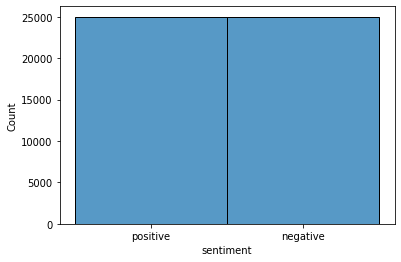

In [4]:
sns.histplot(df, x="sentiment")

# Bag of words

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = list(df['review'])
vectorizer = CountVectorizer(max_df=5, stop_words='english')
X_vect = vectorizer.fit_transform(corpus)
vectorizer.get_feature_names_out()


#print(X.toarray())

array(['00000000000', '0000000000001', '00000001', ..., 'żmijewski',
       'יגאל', 'כרמון'], dtype=object)

In [7]:
X_vect.shape

(50000, 67943)

In [8]:
vectorizer.vocabulary_

{'penitentary': 44905,
 'inwards': 30584,
 'gangstas': 23830,
 'scuffles': 52886,
 'polari': 46266,
 'terrificly': 59693,
 'murals': 40584,
 'johanson': 31603,
 'petter': 45266,
 'schnitzler': 52573,
 'discerns': 16916,
 'grenier': 25669,
 'selflessness': 53186,
 'seahunt': 52947,
 '950': 1041,
 'obsessives': 42578,
 'parachutes': 44237,
 'finsished': 22008,
 'mercs': 38446,
 'schemed': 52472,
 'schmucks': 52562,
 'loneley': 35583,
 'moeller': 39563,
 'selfs': 53189,
 'bratwurst': 8356,
 'tils': 60349,
 'krieger': 33518,
 'gms': 24926,
 'mehehe': 38199,
 'bolls': 7760,
 'cromed': 14270,
 'scheisse': 52464,
 'wiff': 66034,
 'bowdler': 8163,
 'bowdlerization': 8166,
 'recommand': 49165,
 'snazzier': 55353,
 'obee': 42494,
 'newbury': 41537,
 'berkshire': 6582,
 'haggery': 26438,
 'pickers': 45581,
 'lithgows': 35311,
 'sneery': 55367,
 'waite': 65065,
 'fairbrass': 20990,
 'qaulen': 48058,
 'rajnikanth': 48576,
 'wwwaaaaayyyyy': 66839,
 'crissakes': 14199,
 'worldfest': 66626,
 'twizzler

# Classification

In [9]:
from sklearn.model_selection import train_test_split

y = df['sentiment']
X = df['review']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)


In [19]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('vectorizer', CountVectorizer(stop_words='english')),
    ('model', MultinomialNB())
]

)

pipeline.fit(X_train, y_train)

TypeError: __init__() got an unexpected keyword argument 'random_state'

In [35]:
pipeline.named_steps['vectorizer'].transform(X_train).shape

(33500, 86049)

In [11]:
pred = pipeline.predict(X_test)
pred

array(['negative', 'positive', 'negative', ..., 'positive', 'positive',
       'negative'], dtype='<U8')

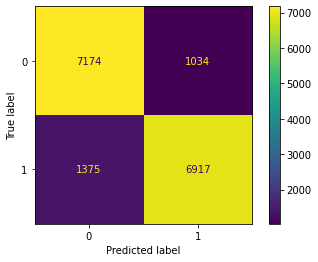

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()



In [13]:
from sklearn.metrics import classification_report

print(classification_report(y_test,pred))

# Accuracy 85%

              precision    recall  f1-score   support

    negative       0.84      0.87      0.86      8208
    positive       0.87      0.83      0.85      8292

    accuracy                           0.85     16500
   macro avg       0.85      0.85      0.85     16500
weighted avg       0.85      0.85      0.85     16500



# Stemmatization

In [90]:
from nltk.stem import PorterStemmer
import re

def stemming_tokenizer(str_input):
    words = re.sub(r"[^A-Za-z0-9\-]", " ", str_input).lower().split()
    porter = PorterStemmer()
    words = [PorterStemmer.stem(porter,word) for word in words]
    return words


pipeline_stemmed = Pipeline([
    ('vectorizer', CountVectorizer(stop_words='english', tokenizer=stemming_tokenizer)),
    ('model', MultinomialNB())
]

)

pipeline_stemmed.fit(X_train, y_train)


Pipeline(steps=[('vectorizer',
                 CountVectorizer(stop_words=['the', 'in', 'on'],
                                 tokenizer=<function stemming_tokenizer at 0x7fc1d1544700>)),
                ('model', MultinomialNB())])

In [113]:
# Récupération état intermédiaire des données dans le pipeline

data_transformed = pipeline_stemmed.named_steps['vectorizer'].vocabulary_

In [96]:
stemming_tokenizer("I like playing football with friends")

['i', 'like', 'play', 'footbal', 'with', 'friend']

In [114]:
len(data_transformed)

83786

In [15]:
pred_stemmed = pipeline_stemmed.predict(X_test)

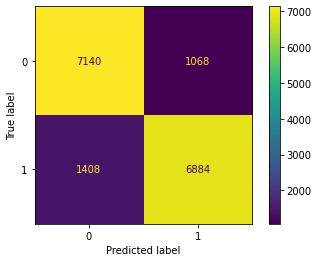

In [16]:
cm_stemmed = confusion_matrix(y_test, pred_stemmed)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_stemmed)
disp.plot()


In [18]:
print(classification_report(y_test,pred_stemmed))

              precision    recall  f1-score   support

    negative       0.84      0.87      0.85      8208
    positive       0.87      0.83      0.85      8292

    accuracy                           0.85     16500
   macro avg       0.85      0.85      0.85     16500
weighted avg       0.85      0.85      0.85     16500



# Lemmatization

In [41]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /home/marouan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/marouan/nltk_data...
[nltk_data]   Unzipping corpora/omw-1.4.zip.


True

In [98]:
from nltk.stem import WordNetLemmatizer 


def lemming_tokenizer(str_input):
    words = re.sub(r"[^A-Za-z0-9\-]", " ", str_input).lower().split()
    porter = WordNetLemmatizer()
    words = [WordNetLemmatizer.lemmatize(porter,word) for word in words]
    return words


pipeline_lemmed = Pipeline([
    ('vectorizer', CountVectorizer(stop_words='english', tokenizer=lemming_tokenizer)),
    ('model', MultinomialNB())
]

)

pipeline_lemmed.fit(X_train, y_train)


Pipeline(steps=[('vectorizer',
                 CountVectorizer(stop_words='english',
                                 tokenizer=<function lemming_tokenizer at 0x7fc1e4eadca0>)),
                ('model', MultinomialNB())])

In [43]:
data_transformed = pipeline_lemmed.named_steps['vectorizer'].transform(X_train)

In [44]:
data_transformed.shape

(33500, 102349)

In [46]:
pred_lemmed = pipeline_lemmed.predict(X_test)

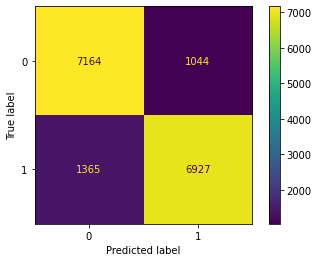

In [48]:
cm_lemmed = confusion_matrix(y_test, pred_lemmed)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_lemmed)
disp.plot()

In [50]:
print(classification_report(y_test,pred_lemmed))

              precision    recall  f1-score   support

    negative       0.84      0.87      0.86      8208
    positive       0.87      0.84      0.85      8292

    accuracy                           0.85     16500
   macro avg       0.85      0.85      0.85     16500
weighted avg       0.85      0.85      0.85     16500



# Bigram Bag of words

In [52]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

pipeline_bi = Pipeline([
    ('vectorizer', CountVectorizer(stop_words='english', ngram_range=(2,2))),
    ('model', MultinomialNB())
]
)

pipeline_bi.fit(X_train, y_train)

Pipeline(steps=[('vectorizer',
                 CountVectorizer(ngram_range=(2, 2), stop_words='english')),
                ('model', MultinomialNB())])

In [53]:
pred_bigram = pipeline_bi.predict(X_test)

In [110]:
vocab = pipeline_bi.named_steps['vectorizer'].vocabulary_

In [115]:
vocab

{'randolph scott': 1511612,
 'scott heading': 1647266,
 'heading albuquerque': 872740,
 'albuquerque job': 67312,
 'job uncle': 1005958,
 'uncle way': 1976076,
 'way stage': 2062139,
 'stage held': 1776954,
 'held carrying': 879813,
 'carrying strongbox': 280695,
 'strongbox nice': 1815734,
 'nice lady': 1299621,
 'lady board': 1056476,
 'board concealing': 201688,
 'concealing 10': 381656,
 '10 000': 587,
 '000 brother': 145,
 'brother business': 243387,
 'business robbers': 256715,
 'robbers know': 1591263,
 'know br': 1045272,
 'br br': 220893,
 'br town': 229286,
 'town scott': 1936232,
 'scott goes': 1647254,
 'goes uncle': 806974,
 'uncle job': 1975955,
 'job soon': 1005820,
 'soon learns': 1752778,
 'learns uncle': 1075469,
 'uncle jerk': 1975950,
 'jerk typical': 1001815,
 'typical bad': 1970687,
 'bad guy': 143540,
 'guy westerns': 845636,
 'westerns know': 2073317,
 'know rich': 1047069,
 'rich guy': 1580518,
 'guy wants': 845617,
 'wants richer': 2043571,
 'richer cheating':

In [109]:
[bigram for bigram in pipeline_bi.named_steps['vectorizer'].vocabulary_.keys() if 'The ' in bigram]

[]

In [112]:
len(vocab)

2134642

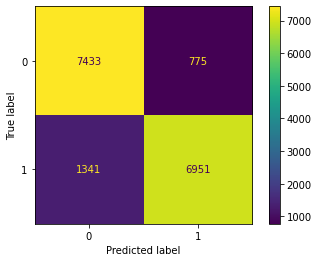

In [54]:
cm_bi = confusion_matrix(y_test, pred_bigram)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_bi)
disp.plot()

In [55]:
print(classification_report(y_test, pred_bigram))

              precision    recall  f1-score   support

    negative       0.85      0.91      0.88      8208
    positive       0.90      0.84      0.87      8292

    accuracy                           0.87     16500
   macro avg       0.87      0.87      0.87     16500
weighted avg       0.87      0.87      0.87     16500



# TF-IDF

In [123]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

pipeline_tfidf = Pipeline([
    ('vectorizer', TfidfVectorizer(ngram_range=(1,2))), # ngram_range=(1,2) donne des meilleurs résultats
    ('model', MultinomialNB())
]
)

pipeline_tfidf.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer(ngram_range=(1, 2))),
                ('model', MultinomialNB())])

In [124]:
pipeline_tfidf.named_steps['vectorizer'].vocabulary_

{'randolph': 1298099,
 'scott': 1388134,
 'is': 843903,
 'heading': 731939,
 'into': 835424,
 'albuquerque': 54796,
 'to': 1650397,
 'take': 1552502,
 'job': 876585,
 'with': 1812116,
 'his': 755936,
 'uncle': 1700857,
 'however': 781143,
 'on': 1150246,
 'the': 1583538,
 'way': 1768639,
 'there': 1617333,
 'stage': 1495521,
 'held': 736521,
 'up': 1716740,
 'even': 533457,
 'though': 1635510,
 'they': 1621290,
 'are': 122263,
 'not': 1107089,
 'carrying': 295024,
 'strongbox': 1521123,
 'nice': 1094522,
 'lady': 910826,
 'board': 225364,
 'concealing': 360680,
 '10': 515,
 '000': 75,
 'for': 613344,
 'her': 739782,
 'and': 81200,
 'brother': 256104,
 'business': 265397,
 'robbers': 1350698,
 'seem': 1400134,
 'know': 904090,
 'this': 1627542,
 'br': 239734,
 'once': 1155246,
 'in': 803273,
 'town': 1672433,
 'goes': 675722,
 'about': 18633,
 'he': 727691,
 'soon': 1478688,
 'learns': 924519,
 'that': 1574687,
 'jerk': 873906,
 'typical': 1696030,
 'bad': 165181,
 'guy': 701377,
 'from

In [73]:
pred_tfidf = pipeline_tfidf.predict(X_test)

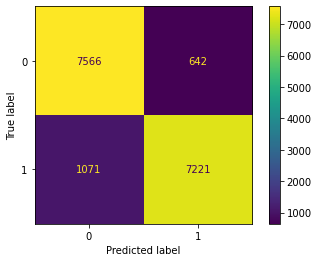

In [70]:
cm_tfidf = confusion_matrix(y_test, pred_tfidf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_tfidf)
disp.plot()

In [71]:
print(classification_report(y_test, pred_tfidf))

              precision    recall  f1-score   support

    negative       0.88      0.92      0.90      8208
    positive       0.92      0.87      0.89      8292

    accuracy                           0.90     16500
   macro avg       0.90      0.90      0.90     16500
weighted avg       0.90      0.90      0.90     16500

